In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from sklearn.utils import resample

# Define dataset paths
dataset_path = "/content/drive/MyDrive/dataset"
sickle_txt_path = os.path.join(dataset_path, "sickle_slides_new_march.txt")
folders = [
    os.path.join(dataset_path, "thin_films_part/sickle3-edofed"),
    os.path.join(dataset_path, "thin_films_part2/sickle-edofed")
]

In [2]:
# Read label file
def read_labels(txt_path):
    labels = {}
    with open(txt_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) == 2:
                folder_name, label = parts[0].strip(), int(parts[1].strip())
                labels[folder_name] = label
    return labels

labels = read_labels(sickle_txt_path)

In [3]:
# Debug: Print first 20 label entries
print("First 20 entries in labels dictionary:")
for i, (key, value) in enumerate(labels.items()):
    print(f"{repr(key)} -> {value}")
    if i == 19:
        break

First 20 entries in labels dictionary:
'010319-05r1-S-A-S1-20190816160305' -> 0
'060319-02-S-A-S1-20190816170548' -> 0
'101017-04-S-A-S1-20190510101904' -> 0
'101017-07-S-A-S1-20190510112330' -> 1
'101017-09-S-A-S1-20190510123456' -> 1
'101017-11-S-A-S1-20190510135515' -> 1
'101017-12-S-A-S1-20190603121110' -> 1
'101017-15-S-A-S1-20190603125932' -> 0
'101017-16-S-A-S1-20190603132416' -> 0
'101017-17-S-A-S1-20190603145137' -> 1
'101017-18-S-A-S1-20190603151602' -> 0
'101017-19-S-A-S1-20190603163732' -> 1
'101017-21-S-A-S1-20190603172727' -> 1
'101017-24-S-A-S1-20190604115146' -> 1
'101017-26-S-A-S1-20190604140515' -> 0
'150218-01-S-A-S1-20190424164843' -> 1
'171017-21-S-A-S1-20190624162525' -> 0
'190917-08-S-A-S1-20190221131903' -> 1
'190917-09-S-A-S1-20190225140514' -> 1
'201117-05-S-A-S1-20190502130022' -> 0


In [4]:
# Store image paths and classes in a DataFrame
image_data = []

for folder in folders:
    for subdir, _, files in os.walk(folder):
        folder_name = os.path.basename(subdir)
        label = labels.get(folder_name, -1)
        for file in files:
            if file.lower().endswith(".tiff"):
                image_data.append([os.path.join(subdir, file), label])

In [5]:
print(image_data)

[['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos070_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos052_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos177_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos165_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos142_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos106_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPos140_EDOF_RGB.tiff', 0], ['/content/drive/MyDrive/dataset/thin_films_part2/sickle-edofed/060319-02-S-A-S1-20190816170548/FieldPo

In [6]:
len(image_data)

1357

In [7]:
# Create DataFrame
df = pd.DataFrame(image_data, columns=["image_path", "class"])
df = df[df["class"] != -1]
# Display first few rows
df.head()

,image_path,class
0,/content/drive/MyDrive/dataset/thin_films_part...,0
1,/content/drive/MyDrive/dataset/thin_films_part...,0
2,/content/drive/MyDrive/dataset/thin_films_part...,0
3,/content/drive/MyDrive/dataset/thin_films_part...,0
4,/content/drive/MyDrive/dataset/thin_films_part...,0


In [8]:
# Display dataset statistics
print(f"Total images: {len(df)}")
print(df["class"].value_counts())

Total images: 1343
class
0    813
1    530
Name: count, dtype: int64


In [9]:
# Define class names
class_names = {0: "Non-Sickle Cell", 1: "Sickle Cell"}
df["class_name"] = df["class"].map(class_names)

<ipython-input-9-2bb4c9a0a6da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class_name"] = df["class"].map(class_names)


In [10]:
# Display dataset statistics
print(f"Total images: {len(df)}")
print(df["class_name"].value_counts())

Total images: 1343
class_name
Non-Sickle Cell    813
Sickle Cell        530
Name: count, dtype: int64


<ipython-input-11-1550b42bd64c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["class_name"], palette="viridis")


Text(0.5, 1.0, 'Distribution of Sickle Cell and Non-Sickle Cell Images')

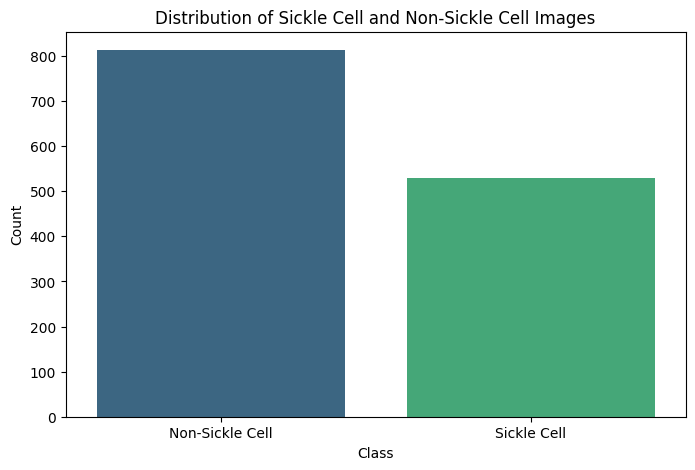

In [11]:
# Visualization
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["class_name"], palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Sickle Cell and Non-Sickle Cell Images")

In [12]:
# Display sample images in separate graphs
def display_samples(df, class_label, class_name, num_samples=5):
    sample_images = df[df["class"] == class_label].sample(n=num_samples, random_state=42)["image_path"].tolist()
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Sample Images: {class_name}", fontsize=14)
    plt.show()

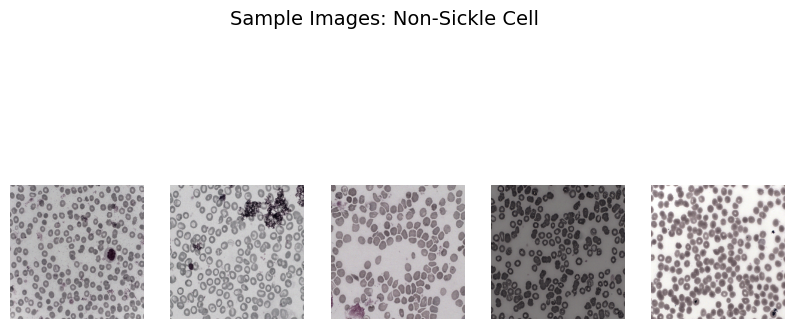

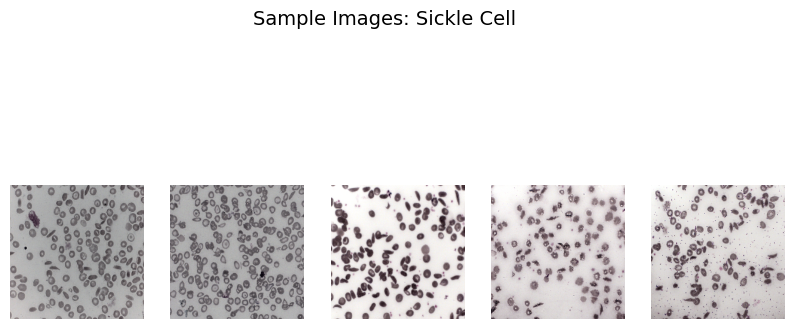

In [13]:
# Display samples separately
display_samples(df, 0, "Non-Sickle Cell")
display_samples(df, 1, "Sickle Cell")

In [14]:
# Remove duplicate images
df = df.drop_duplicates(subset=["image_path"])

In [15]:
# Resize images to 224x224
def resize_images(df, target_size=(224, 224)):
    for img_path in df["image_path"]:
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(img_path, resized_img)

resize_images(df)

In [16]:
# Balance the dataset
class_0 = df[df["class"] == 0]
class_1 = df[df["class"] == 1]

if len(class_0) > len(class_1):
    class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
    df_balanced = pd.concat([class_0, class_1_upsampled])
else:
    class_0_upsampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)
    df_balanced = pd.concat([class_0_upsampled, class_1])

df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

df_balanced.to_csv("/content/drive/MyDrive/dataset/cleaned_dataset.csv", index=False)

In [17]:
# Display dataset statistics
print(f"Total images: {len(df_balanced)}")
print(df_balanced["class"].value_counts())

Total images: 1626
class
0    813
1    813
Name: count, dtype: int64


<ipython-input-18-91f82770fa03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_balanced["class"], palette="viridis")


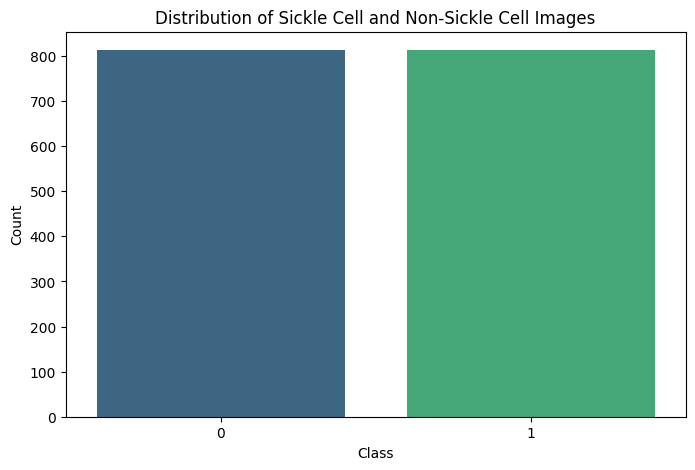

In [18]:
# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=df_balanced["class"], palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Sickle Cell and Non-Sickle Cell Images")
plt.show()

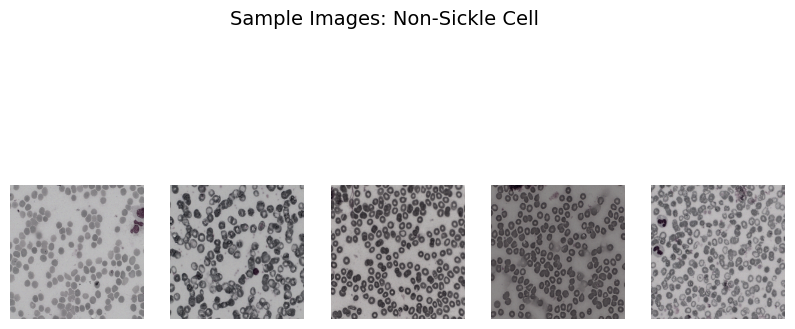

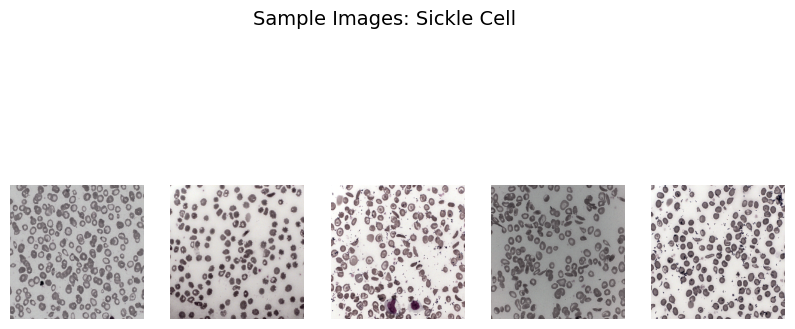

In [19]:
# Display sample images
def display_samples(df, class_name, num_samples=5):
    sample_images = df.sample(n=num_samples, random_state=42)["image_path"].tolist()
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Sample Images: {class_name}", fontsize=14)
    plt.show()

# Display separate samples for each class
display_samples(df_balanced[df_balanced["class"] == 0], "Non-Sickle Cell")
display_samples(df_balanced[df_balanced["class"] == 1], "Sickle Cell")